<a href="https://colab.research.google.com/github/AMEY-GAIKAR/Kaggle-Colaboratory/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = sns.load_dataset('iris' )

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
df.shape

(150, 5)

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [9]:
df.petal_length.max()

6.9

In [10]:
df.groupby(by='species')['species'].count()

species
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<Axes: xlabel='petal_length', ylabel='Count'>

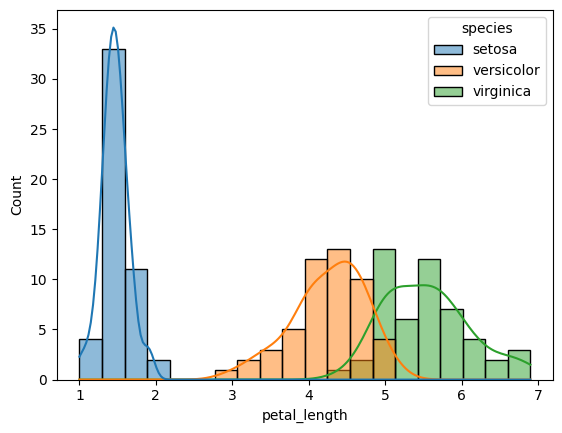

In [11]:
sns.histplot(data=df, x='petal_length', hue='species', bins=20, kde=True)

<Axes: xlabel='sepal_length', ylabel='Count'>

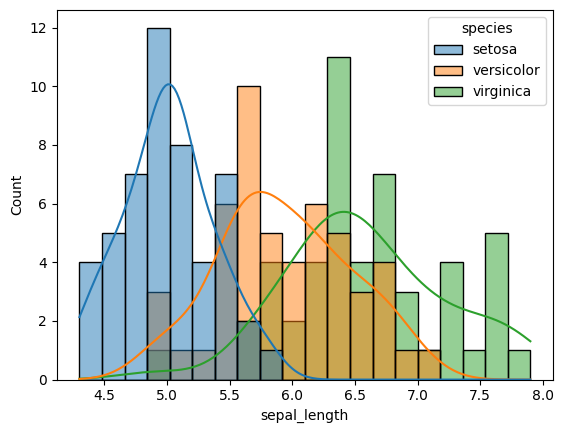

In [12]:
sns.histplot(data=df, x='sepal_length', hue='species', bins=20, kde=True)

In [13]:
setosa = df[df['species'] == 'setosa']
setosa.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
45,4.8,3.0,1.4,0.3,setosa
46,5.1,3.8,1.6,0.2,setosa
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa


<Axes: xlabel='petal_length', ylabel='Count'>

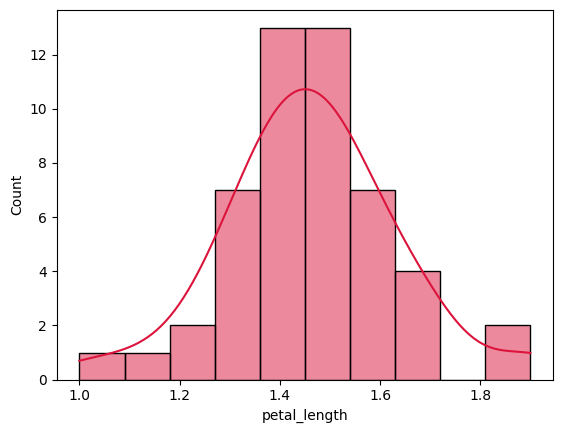

In [14]:
sns.histplot(data=setosa, x='petal_length', kde=True, color='crimson')

<Axes: xlabel='sepal_length', ylabel='Count'>

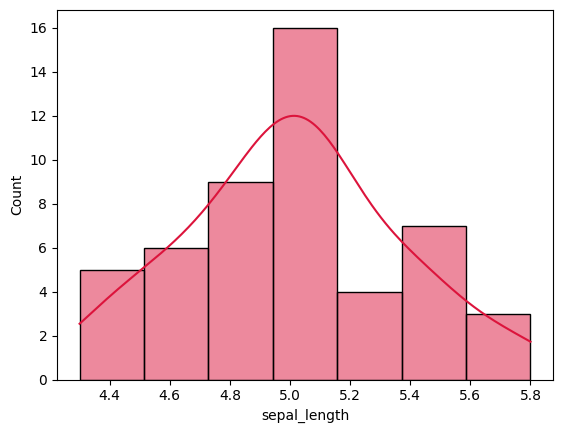

In [15]:
sns.histplot(data=setosa, x='sepal_length', kde=True, color='crimson')

In [16]:
versicolor = df[df['species'] == 'versicolor']
versicolor.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor
99,5.7,2.8,4.1,1.3,versicolor


<Axes: xlabel='petal_length', ylabel='Count'>

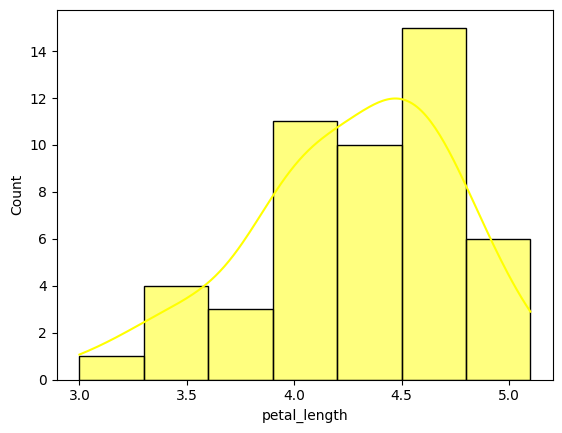

In [17]:
sns.histplot(data=versicolor, x='petal_length', kde=True, color='yellow')

<Axes: xlabel='sepal_length', ylabel='Count'>

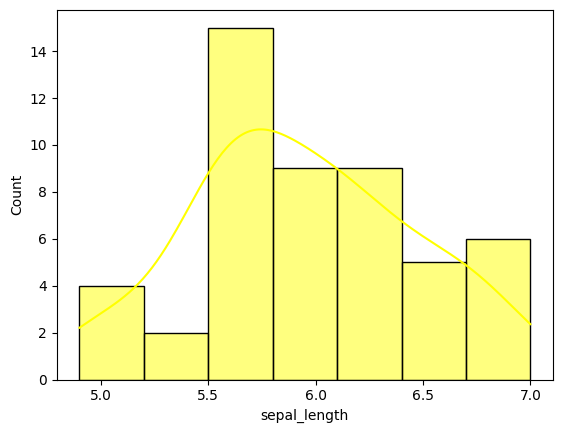

In [18]:
sns.histplot(data=versicolor, x='sepal_length', kde=True, color='yellow')

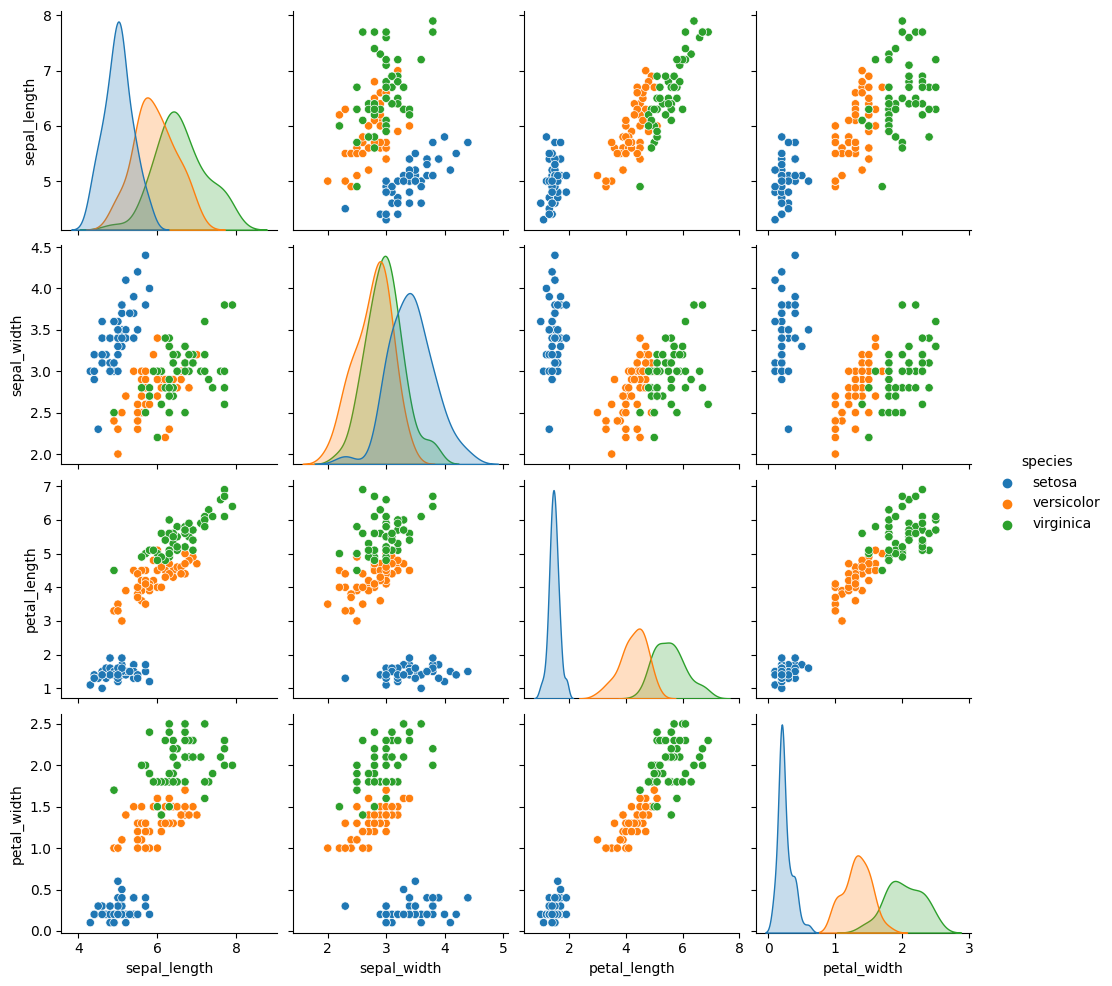

In [19]:
sns.pairplot(df, hue='species')

In [20]:
X = df.drop('species', axis=1)
y = df['species'].map({'setosa':0, 'versicolor':1, 'virginica': 2})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)
d_tree_predictions = d_tree.predict(X_test)
print(confusion_matrix(d_tree_predictions, y_test))
print(classification_report(d_tree_predictions, y_test))

[[16  0  0]
 [ 0 14  0]
 [ 0  2 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      1.00      0.93        14
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)
print(confusion_matrix(rfc_predictions, y_test))
print(classification_report(rfc_predictions, y_test))

[[16  0  0]
 [ 0 14  0]
 [ 0  2 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.88      1.00      0.93        14
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print(confusion_matrix(knn_predictions, y_test))
print(classification_report(knn_predictions, y_test))

[[16  0  0]
 [ 0 13  0]
 [ 0  3 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.81      1.00      0.90        13
           2       1.00      0.81      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



In [24]:
svm = SVC()
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
print(confusion_matrix(svm_predictions, y_test))
print(classification_report(svm_predictions, y_test))

[[16  0  0]
 [ 0 15  0]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [25]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(confusion_matrix(kmeans.labels_, y))
print(classification_report(kmeans.labels_, y))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[ 0 48 14]
 [50  0  0]
 [ 0  2 36]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.00      0.00      0.00        50
           2       0.72      0.95      0.82        38

    accuracy                           0.24       150
   macro avg       0.24      0.32      0.27       150
weighted avg       0.18      0.24      0.21       150



In [26]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

<Axes: >

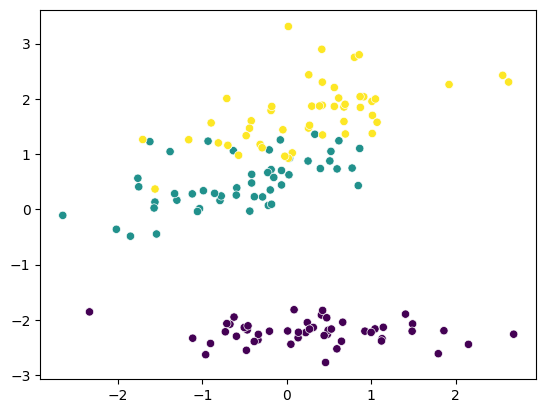

In [27]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_res = pca.transform(scaled_data)
sns.scatterplot(x=pca_res[:,1], y=pca_res[:,0], c=y)